# IMPORTS

In [1]:
import random
import pickle
import glob

import random
import ast

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from collections import Counter

from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





In [2]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [3]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



In [4]:
### streak generator
#### using list.extend

def streak_gen(streak_size, result_size):    ### number of games
  result_streak = []

  n_games = result_size

  n_games_played = 0

  while n_games_played <= n_games:

    streak_size = streak_size
    streak = random.choices(['WS','LS'], weights=(0.5,0.5))[0]

    if streak == 'WS':
      wr = 0.85
      lr = 0.15
      # print(lr,wr)
      
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    else:
      wr = 0.15
      lr = 0.85
      # print(lr,wr)
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    n_games_played += streak_size


  return result_streak[:result_size]

# Generate GAME HISTORIES

## PerfectMM - One Million Games (to use as POPULATION)

In [5]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(135)
np.random.seed(135)

# prob_list = np.linspace(0.49,0.51, 100)
prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

one_million_games = []

# number_of_players = 1000
# games_per_player = 3000
number_of_players = 1
games_per_player = 1000000

for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0
        
        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to one_million_games (3000 players)
    one_million_games.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 14:46:47



----------------------------------------------------
done in 6.471s.
2024-03-26 14:46:53


In [7]:
### check all records have 3000 games per player across 1000 players

### number of games per player
print(len(one_million_games[0]))
### number of players
print(len(one_million_games))

1000000
1


In [8]:
avg_cal_result

# (2.000536867578006, 2.0059375951537683)
# (1.9972764466627473, 2.0020676609036117)
# (1.9998959058989327, 2.003723365922794)
# (2.003923721884669, 2.0039557691305725)


(2.003923721884669, 2.0039557691305725)

In [9]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))

# ### when n=1 games=1000000
# print(np.mean(streak_counter_result[0]))
# print(np.mean(streak_counter_result[1]))


# 2.0018657388686254
# 2.0018657388686254

2.003923721884669
2.0039557691305725


In [10]:
print(np.max(streak_counter(one_million_games[0][:])[0]))
print(np.min(streak_counter(one_million_games[0][:])[0]))

print(np.max(streak_counter(one_million_games[0][:])[1]))
print(np.min(streak_counter(one_million_games[0][:])[1]))



print(np.mean(streak_counter(one_million_games[0])[0]))
print(np.mean(streak_counter(one_million_games[0])[1]))

print(np.std(streak_counter(one_million_games[0])[0]))
print(np.std(streak_counter(one_million_games[0])[1]))

17
1
20
1
2.003923721884669
2.0039557691305725
1.4168229150676865
1.419380547217041


In [10]:
### Metrics from One million games to be used as Population

### mean of streak durations
## 0 for loss // 1 for win
pop_mean_0 = np.mean(streak_counter(one_million_games[0])[0])
pop_mean_1 = np.mean(streak_counter(one_million_games[0])[1])

### std of streak durations
pop_std_0 = np.std(streak_counter(one_million_games[0])[0])
pop_std_1 = np.std(streak_counter(one_million_games[0])[1])


print(f'pop_mean_0: {pop_mean_0}')
print(f'pop_mean_1: {pop_mean_1}')
print(f'pop_std_0: {pop_std_0}')
print(f'pop_std_1: {pop_std_1}')




pop_mean_0: 2.003923721884669
pop_mean_1: 2.0039557691305725
pop_std_0: 1.4168229150676865
pop_std_1: 1.419380547217041


## PerfectMM - 1000 players // 300 games per player (to compare against Population)

In [11]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(6565)
np.random.seed(6565)

prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

perfect_all_records = []

number_of_players = 1000
games_per_player = 300


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to perfect_all_records (3000 players)
    perfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 14:47:33



----------------------------------------------------
done in 2.093s.
2024-03-26 14:47:35


In [12]:
one_perfect = perfect_all_records[400]
len(one_perfect)


300

## NearPerfectMM - 1000 players // 300 games per player (to compare against Population)

In [13]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(2237)
np.random.seed(2237)

prob_list = np.linspace(0.49,0.51, 100)

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

nearperfect_all_records = []

number_of_players = 1000
games_per_player = 300


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to nearperfect_all_records (3000 players)
    nearperfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 14:47:37



----------------------------------------------------
done in 2.395s.
2024-03-26 14:47:39


In [14]:
one_nearperfect = nearperfect_all_records[400]
len(one_nearperfect)

300

## StreakMM - 1000 players // 300 games per player (to compare against Population)

In [15]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(3331)
np.random.seed(3331)

### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak

avg_list_0 = []
avg_list_1 = []

streak_all_records = []
for _ in range(1000):
    result_n = streak_gen(6, 300)     # 3000 games played per player
    
    # streak_all_records.append(pd.Series(result_n))
    streak_all_records.append(result_n)
    
    streak_counter_result = streak_counter(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 14:47:40



----------------------------------------------------
done in 0.105s.
2024-03-26 14:47:40


In [16]:
one_streakmm = streak_all_records[400]
len(one_streakmm)

300

# Analysis - Critical Count(s)

## The definition of CRITICAL COUNT

Critical Count : The frequency in which a record(eg. 300 games) yields streaks of either wins or defeats that surpasses the metrics provided by the Population data within a given sliding window(eg. 50 games). 

## PerfectMM vs Population

### Single PerfectMM vs Population

In [53]:
llen = len(one_perfect)

critical_count = 0

for i in range(llen-50):
    # print(i , i+50)
    one_window = one_perfect[i:i+50]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_std = np.std(lose_streak)
    ws_std = np.std(win_streak)
    
    
    ### z scores
    ### (x_bar_1 - mu1) / (std1/np.sqrt(n1))
    z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
    z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))
    
    
    if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
        critical_count += 1
        print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
        
    # print(f'z_1 : {z_1}')
    
print(f'critical_count : {critical_count}')

i ~ i+50 : 72 ~ 122, z_0 : 2.223192276613692, z_1 : -0.4340925288337708
i ~ i+50 : 73 ~ 123, z_0 : 2.223192276613692, z_1 : -0.008813168797416438
i ~ i+50 : 74 ~ 124, z_0 : 1.9999972939141561, z_1 : 0.2139796309467124
i ~ i+50 : 75 ~ 125, z_0 : 1.9999972939141561, z_1 : 0.2139796309467124
i ~ i+50 : 76 ~ 126, z_0 : 1.9999972939141561, z_1 : -0.22166792912445887
i ~ i+50 : 79 ~ 129, z_0 : 2.223192276613692, z_1 : -0.4340925288337708
i ~ i+50 : 144 ~ 194, z_0 : 1.9999972939141561, z_1 : 0.2139796309467124
i ~ i+50 : 145 ~ 195, z_0 : 2.223192276613692, z_1 : -0.008813168797416438
i ~ i+50 : 146 ~ 196, z_0 : 2.446387259313228, z_1 : 0.22648332511806632
i ~ i+50 : 147 ~ 197, z_0 : 2.223192276613692, z_1 : -0.008813168797416438
i ~ i+50 : 148 ~ 198, z_0 : 2.5796417196132473, z_1 : 0.2139796309467124
i ~ i+50 : 149 ~ 199, z_0 : 2.223192276613692, z_1 : 0.46132755627714156
i ~ i+50 : 150 ~ 200, z_0 : 1.9999972939141561, z_1 : 0.2139796309467124
i ~ i+50 : 151 ~ 201, z_0 : 2.344373550395777, z_

### Critical Counts for all PerfectMM Records

In [54]:
crit_count_list = []

for item in perfect_all_records:
    one_record = item

    llen = len(one_record)

    critical_count = 0

    for i in range(llen-50):
        # print(i , i+50)
        one_window = one_record[i:i+50]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_std = np.std(lose_streak)
        ws_std = np.std(win_streak)


        ### z scores
        ### (x_bar_1 - mu1) / (std1/np.sqrt(n1))
        z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
        z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))


        if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
            critical_count += 1
            # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')

        # print(f'z_1 : {z_1}')

    crit_count_list.append(critical_count)
    # print(f'critical_count : {critical_count}')
    
# print(crit_count_list)

In [55]:
print(np.mean(crit_count_list))
print(np.std(crit_count_list))

22.763
20.68953433502069


In [56]:
perfectmm_pop_crit_count_mean = np.mean(crit_count_list)
perfectmm_pop_crit_count_std = np.std(crit_count_list)

print(perfectmm_pop_crit_count_mean)
print(perfectmm_pop_crit_count_std)

22.763
20.68953433502069


In [57]:
z_crit_count = (np.mean(crit_count_list) - perfectmm_pop_crit_count_mean) / (perfectmm_pop_crit_count_std/np.sqrt(len(crit_count_list)))
print(z_crit_count)

0.0


In [58]:
crit_count_list[:10]

[7, 4, 4, 0, 14, 46, 47, 47, 41, 0]

In [59]:
print(Counter(crit_count_list))

Counter({0: 123, 1: 31, 6: 29, 8: 29, 2: 26, 9: 26, 10: 24, 3: 24, 14: 23, 15: 23, 5: 23, 18: 21, 7: 20, 13: 20, 4: 18, 20: 18, 34: 18, 19: 17, 28: 17, 40: 16, 38: 16, 31: 16, 12: 16, 11: 16, 16: 15, 25: 15, 26: 14, 21: 14, 23: 13, 32: 13, 17: 13, 29: 12, 22: 12, 27: 12, 42: 12, 46: 11, 47: 11, 33: 11, 35: 11, 43: 10, 50: 9, 30: 9, 49: 9, 55: 9, 39: 9, 41: 8, 45: 8, 53: 7, 54: 7, 24: 7, 52: 7, 59: 7, 37: 7, 36: 6, 44: 6, 56: 6, 60: 5, 64: 4, 58: 3, 75: 3, 65: 3, 79: 3, 51: 3, 62: 3, 84: 3, 72: 3, 57: 3, 68: 2, 85: 2, 63: 2, 66: 2, 48: 2, 69: 2, 74: 2, 77: 2, 76: 2, 61: 2, 67: 2, 71: 1, 82: 1, 87: 1, 88: 1, 93: 1, 86: 1, 80: 1, 99: 1, 92: 1, 105: 1, 73: 1, 70: 1})


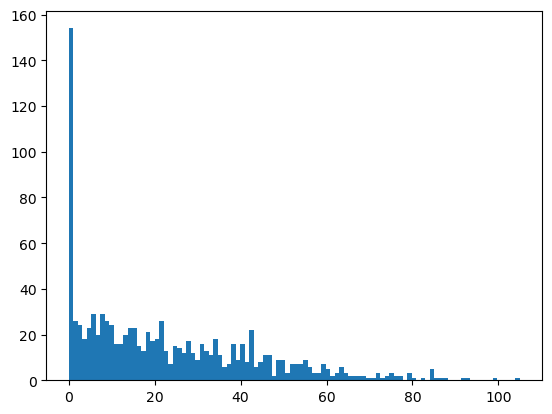

In [60]:
plt.hist(crit_count_list, bins=100)
plt.show()

## NearPerfctMM vs Population

### Single NearPerfectMM vs Population

In [61]:
one_nearperfect = nearperfect_all_records[141]
len(one_nearperfect)

300

In [62]:
llen = len(one_nearperfect)

critical_count = 0

for i in range(llen-50):
    # print(i , i+50)
    one_window = one_nearperfect[i:i+50]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_std = np.std(lose_streak)
    ws_std = np.std(win_streak)
    
    
    ### z scores
    ### (x_bar_1 - mu1) / (std1/np.sqrt(n1))
    z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
    z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))
    
    
    if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
        critical_count += 1
        print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
        
    # print(f'z_1 : {z_1}')
    
print(f'critical_count : {critical_count}')

i ~ i+50 : 108 ~ 158, z_0 : -0.7168820300243041, z_1 : -2.0619822922966753
critical_count : 1


### Critical Counts for all NearPerfectMM Records

In [63]:
crit_count_list = []

for item in nearperfect_all_records:
    one_record = item

    llen = len(one_record)

    critical_count = 0

    for i in range(llen-50):
        # print(i , i+50)
        one_window = one_record[i:i+50]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_std = np.std(lose_streak)
        ws_std = np.std(win_streak)


        ### z scores
        ### (x_bar_1 - mu1) / (std1/np.sqrt(n1))
        z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
        z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))


        if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
            critical_count += 1
            # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')

        # print(f'z_1 : {z_1}')

    crit_count_list.append(critical_count)
    # print(f'critical_count : {critical_count}')
    
# print(crit_count_list)

In [64]:
print(np.mean(crit_count_list))
print(np.std(crit_count_list))

22.193
20.770068632529842


In [65]:
z_crit_count = (np.mean(crit_count_list) - perfectmm_pop_crit_count_mean) / (perfectmm_pop_crit_count_std/np.sqrt(len(crit_count_list)))
print(z_crit_count)

-0.8712125836708323


In [66]:
print(Counter(crit_count_list))

Counter({0: 131, 2: 36, 5: 29, 4: 27, 1: 26, 7: 24, 16: 24, 24: 24, 11: 23, 14: 22, 3: 22, 10: 21, 18: 21, 26: 20, 6: 20, 20: 19, 29: 19, 8: 19, 13: 18, 27: 17, 15: 17, 21: 17, 17: 16, 12: 16, 22: 16, 35: 14, 9: 14, 25: 13, 32: 13, 23: 13, 46: 13, 39: 12, 19: 12, 31: 12, 33: 11, 41: 11, 28: 11, 38: 10, 37: 10, 36: 10, 49: 10, 45: 9, 54: 9, 55: 7, 44: 7, 43: 7, 53: 6, 42: 6, 52: 6, 69: 6, 51: 6, 59: 6, 40: 6, 30: 5, 63: 5, 34: 5, 56: 4, 72: 4, 65: 4, 60: 4, 84: 3, 61: 3, 70: 3, 76: 3, 77: 3, 66: 3, 62: 3, 48: 3, 47: 3, 64: 3, 50: 3, 58: 2, 57: 2, 97: 2, 102: 2, 79: 2, 80: 2, 75: 2, 95: 1, 82: 1, 67: 1, 74: 1, 68: 1, 93: 1, 88: 1, 105: 1})


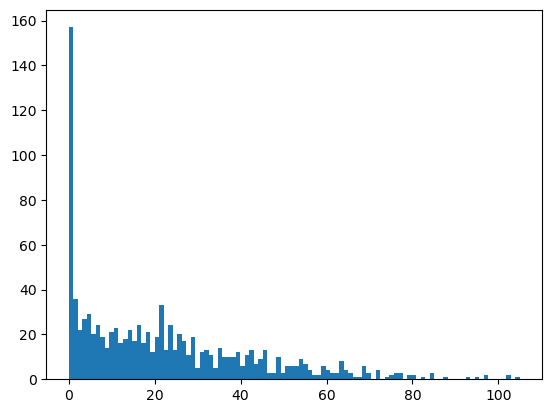

In [67]:
plt.hist(crit_count_list, bins=100)
plt.show()

## StreakMM vs Population

### Single StreakMM vs Population

In [68]:
one_streakmm = streak_all_records[666]
len(one_streakmm)

300

In [69]:
llen = len(one_streakmm)

critical_count = 0

for i in range(llen-50):
    # print(i , i+50)
    one_window = one_streakmm[i:i+50]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_std = np.std(lose_streak)
    ws_std = np.std(win_streak)
    
    
    ### z scores
    ### (x_bar_1 - mu1) / (std1/np.sqrt(number_of_streak_durations))
    z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
    z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))
    
    
    if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
        critical_count += 1
        print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
        
    # print(f'z_1 : {z_1}')
    
print(f'critical_count : {critical_count}')

i ~ i+50 : 0 ~ 50, z_0 : 3.4857210836834467, z_1 : 0.9884769524394574
i ~ i+50 : 1 ~ 51, z_0 : 2.814909888830717, z_1 : 0.9884769524394574
i ~ i+50 : 2 ~ 52, z_0 : 2.5796417196132473, z_1 : 0.6961717874362168
i ~ i+50 : 3 ~ 53, z_0 : 2.344373550395777, z_1 : 0.9310160185952919
i ~ i+50 : 8 ~ 58, z_0 : 2.344373550395777, z_1 : 0.9310160185952919
i ~ i+50 : 9 ~ 59, z_0 : 2.5796417196132473, z_1 : 0.6961717874362168
i ~ i+50 : 10 ~ 60, z_0 : 2.814909888830717, z_1 : 0.46132755627714156
i ~ i+50 : 11 ~ 61, z_0 : 3.050178058048187, z_1 : 0.22648332511806632
i ~ i+50 : 12 ~ 62, z_0 : 3.050178058048187, z_1 : -0.23160596854154528
i ~ i+50 : 13 ~ 63, z_0 : 3.050178058048187, z_1 : -0.23160596854154528
i ~ i+50 : 14 ~ 64, z_0 : 3.050178058048187, z_1 : -0.23160596854154528
i ~ i+50 : 15 ~ 65, z_0 : 2.6695822420127637, z_1 : -0.4543987682856736
i ~ i+50 : 16 ~ 66, z_0 : 2.6695822420127637, z_1 : -0.8589417282523937
i ~ i+50 : 17 ~ 67, z_0 : 2.331703730895983, z_1 : -1.0713663279617056
i ~ i+50 :

### Critical Counts for all StreakMM Records

In [70]:
crit_count_list = []

for item in streak_all_records:
    one_record = item

    llen = len(one_record)

    critical_count = 0

    for i in range(llen-50):
        # print(i , i+50)
        one_window = one_record[i:i+50]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_std = np.std(lose_streak)
        ws_std = np.std(win_streak)


        ### z scores
        ### (x_bar_1 - mu1) / (std1/np.sqrt(n1))
        z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
        z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))


        if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
            critical_count += 1
            # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')

        # print(f'z_1 : {z_1}')

    crit_count_list.append(critical_count)
    # print(f'critical_count : {critical_count}')
    
# print(crit_count_list)

In [71]:
print(np.mean(crit_count_list))
print(np.std(crit_count_list))

216.297
27.548952629818796


In [72]:
z_crit_count = (np.mean(crit_count_list) - perfectmm_pop_crit_count_mean) / (perfectmm_pop_crit_count_std/np.sqrt(len(crit_count_list)))
print(z_crit_count)

295.8057125757031


In [73]:
print(Counter(crit_count_list))

Counter({250: 67, 247: 25, 209: 20, 230: 20, 239: 20, 241: 19, 217: 19, 225: 19, 232: 19, 228: 19, 245: 18, 219: 17, 233: 17, 240: 17, 212: 17, 235: 16, 218: 16, 249: 16, 234: 16, 236: 16, 214: 15, 215: 15, 244: 15, 227: 14, 229: 14, 224: 14, 231: 14, 242: 14, 237: 14, 238: 14, 222: 13, 226: 13, 202: 12, 243: 11, 220: 11, 213: 11, 211: 11, 248: 11, 204: 11, 221: 11, 216: 11, 246: 10, 210: 10, 193: 9, 208: 9, 207: 9, 205: 9, 183: 9, 192: 8, 182: 8, 197: 8, 184: 8, 206: 8, 186: 8, 176: 8, 196: 8, 177: 7, 201: 7, 190: 7, 198: 7, 173: 7, 200: 7, 180: 6, 203: 6, 174: 6, 223: 6, 195: 6, 189: 6, 179: 5, 188: 5, 191: 5, 187: 5, 185: 5, 172: 5, 199: 5, 170: 4, 181: 4, 162: 4, 167: 3, 164: 3, 147: 3, 154: 3, 169: 3, 143: 3, 137: 3, 159: 2, 145: 2, 158: 2, 157: 2, 178: 2, 194: 2, 175: 2, 160: 2, 166: 2, 153: 2, 163: 2, 171: 1, 155: 1, 161: 1, 156: 1, 138: 1, 116: 1, 126: 1, 134: 1, 89: 1, 120: 1, 115: 1, 165: 1, 149: 1, 127: 1, 104: 1, 168: 1, 131: 1, 151: 1, 87: 1, 142: 1, 140: 1})


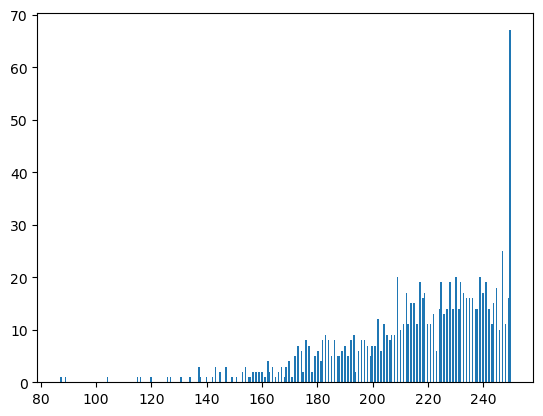

In [76]:
plt.hist(crit_count_list, bins=300)
plt.show()

## PerfectMM Critical Count Mean & Standard Deviation to be used as True Population  
-> Defined above in 'PerfectMM vs Population'  
-> Now renamed as ... true_pop_crit_count_mean & true_pop_crit_count_std  

In [108]:
# perfectmm_pop_crit_count_mean = np.mean(crit_count_list)
# perfectmm_pop_crit_count_std = np.std(crit_count_list)

print(perfectmm_pop_crit_count_mean)
print(perfectmm_pop_crit_count_std)

# perfectmm_pop_crit_count_mean = 22.763
# perfectmm_pop_crit_count_std = 20.68953433502069

# print(np.mean(crit_count_list))
# print(np.std(crit_count_list))

22.763
20.68953433502069


In [109]:
true_pop_crit_count_mean = perfectmm_pop_crit_count_mean
true_pop_crit_count_std = perfectmm_pop_crit_count_std

### Live Data - Bronze 0

In [113]:
parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')
print(datafiles_list[:5])


crit_count_list = []
for one_record_file in datafiles_list:
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    # print(f'length : {len(one_record)}')
    
    
    ### critical count analysis
    llen = len(one_record)

    critical_count = 0
    for i in range(llen-50):
        # print(i , i+50)
        one_window = one_record[i:i+50]
    
        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_std = np.std(lose_streak)
        ws_std = np.std(win_streak)


        ### z scores
        ### (x_bar_1 - mu1) / (std1/np.sqrt(number_of_streak_durations))
        z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
        z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))

    

        if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
            critical_count += 1
            # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
        
    crit_count_list.append(critical_count)
    
    # print(f'critical_count : {critical_count}')
    # print('-----------------')
        # print(f'z_1 : {z_1}')
        
print(f'len before removal of 0s : {len(crit_count_list)}')
### remove 0s
crit_count_list = [x for x in crit_count_list if x != 0]
print(f'len after removal of 0s : {len(crit_count_list)}')
        
z_crit_count = (np.mean(crit_count_list) - true_pop_crit_count_mean) / (true_pop_crit_count_std/np.sqrt(len(crit_count_list)))
print(z_crit_count)
print('-------------------------')

['live_data/raw/bronze/partition_0\\03한주민.txt', 'live_data/raw/bronze/partition_0\\0서풋0.txt', 'live_data/raw/bronze/partition_0\\1161kk.txt', 'live_data/raw/bronze/partition_0\\12312415411213.txt', 'live_data/raw/bronze/partition_0\\123세봐넌디짐.txt']
len before removal of 0s : 813
len after removal of 0s : 625
8.766026197748092


### Live Data - Bronze 1

In [114]:
parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_1/*.txt')
print(datafiles_list[:5])


crit_count_list = []
for one_record_file in datafiles_list:
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    # print(f'length : {len(one_record)}')
    
    
    ### critical count analysis
    llen = len(one_record)

    critical_count = 0
    for i in range(llen-50):
        # print(i , i+50)
        one_window = one_record[i:i+50]
    
        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_std = np.std(lose_streak)
        ws_std = np.std(win_streak)


        ### z scores
        ### (x_bar_1 - mu1) / (std1/np.sqrt(number_of_streak_durations))
        z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
        z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))

    

        if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
            critical_count += 1
            # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
        
    crit_count_list.append(critical_count)
    
    # print(f'critical_count : {critical_count}')
    # print('-----------------')
        # print(f'z_1 : {z_1}')
        
print(f'len before removal of 0s : {len(crit_count_list)}')
### remove 0s
crit_count_list = [x for x in crit_count_list if x != 0]
print(f'len after removal of 0s : {len(crit_count_list)}')
        
z_crit_count = (np.mean(crit_count_list) - true_pop_crit_count_mean) / (true_pop_crit_count_std/np.sqrt(len(crit_count_list)))
print(z_crit_count)
print('-------------------------')

['live_data/raw/bronze/partition_1\\0l븥린.txt', 'live_data/raw/bronze/partition_1\\0tlqkf0.txt', 'live_data/raw/bronze/partition_1\\1017번째계정.txt', 'live_data/raw/bronze/partition_1\\1249559del.txt', 'live_data/raw/bronze/partition_1\\145cm.txt']
len before removal of 0s : 985
len after removal of 0s : 703
8.388446210463274
-------------------------


### For All the REST of ELOS & PARTITIONS

In [119]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################



### https://stackoverflow.com/questions/74949556/poetry-fails-to-install-tensorflow

### Training image data path
# parent of ['saved_lists/perfectmm/', 'saved_lists/nearperfectmm/', 'saved_lists/streakmm/']
parent_data_folder = 'live_data/raw'
# print(parent_data_folder)

elo_list = glob.glob(f'{parent_data_folder}/*') 

# print(elo_list)

for item in elo_list:
    partitions_list = glob.glob(f'{item}/*')
    print(item)
    print(partitions_list)
    
    for partition in partitions_list:
        datafiles_list = glob.glob(f'{partition}/*.txt')
        print(datafiles_list[:2])
        
        crit_count_list = []
        for one_record_file in datafiles_list:
            with open(one_record_file, 'r') as datafile:
                one_record = datafile.read()
            
            one_record = ast.literal_eval(one_record)
            
            ### critical count analysis
            llen = len(one_record)
            
            critical_count = 0
            for i in range(llen-50):
                # print(i , i+50)
                one_window = one_record[i:i+50]
                
                streak_counter_result = streak_counter(one_window)
                lose_streak = streak_counter_result[0]
                win_streak = streak_counter_result[1]

                ### ls = lose streak // ws = win streak
                ### means within one window (50 games)
                ls_mean = np.mean(lose_streak)
                ws_mean = np.mean(win_streak)

                ### standard deviations within one window (50 games)
                ls_std = np.std(lose_streak)
                ws_std = np.std(win_streak)


                ### z scores
                ### (x_bar_1 - mu1) / (std1/np.sqrt(number_of_streak_durations))
                z_0 = (ls_mean - pop_mean_0) / (pop_std_0/np.sqrt(len(lose_streak)))
                z_1 = (ws_mean - pop_mean_1) / (pop_std_1/np.sqrt(len(win_streak)))
                
                if abs(z_0) >= 1.96 or abs(z_1) >= 1.96:
                    critical_count += 1
                    # print(f'i ~ i+50 : {i} ~ {i+50}, z_0 : {z_0}, z_1 : {z_1}')
                    
            crit_count_list.append(critical_count)

    
        print(f'len before removal of 0s : {len(crit_count_list)}')
        ### remove 0s
        crit_count_list = [x for x in crit_count_list if x != 0]
        print(f'len after removal of 0s : {len(crit_count_list)}')

        z_crit_count = (np.mean(crit_count_list) - true_pop_crit_count_mean) / (true_pop_crit_count_std/np.sqrt(len(crit_count_list)))
        print(z_crit_count)
        print('--------End of One Partition-----------------')
    
    
    
    
    
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2023-12-17 20:40:14


live_data/raw\bronze
['live_data/raw\\bronze\\partition_0', 'live_data/raw\\bronze\\partition_1', 'live_data/raw\\bronze\\partition_2', 'live_data/raw\\bronze\\partition_3', 'live_data/raw\\bronze\\partition_4']
['live_data/raw\\bronze\\partition_0\\03한주민.txt', 'live_data/raw\\bronze\\partition_0\\0서풋0.txt']
len before removal of 0s : 813
len after removal of 0s : 625
8.766026197748092
--------End of One Partition-----------------
['live_data/raw\\bronze\\partition_1\\0l븥린.txt', 'live_data/raw\\bronze\\partition_1\\0tlqkf0.txt']
len before removal of 0s : 985
len after removal of 0s : 703
8.388446210463274
--------End of One Partition-----------------
['live_data/raw\\bronze\\partition_2\\00나리00.txt', 'live_data/raw\\bronze\\partition_2\\01031784315.txt']
len before removal of 0s : 992
len after removal of 0s : 879
11.453049635071576
--------End of One Partition-----------------
['live_data/raw\\bronze\\partition_3\\0120123.txt', 'live_data/raw\\bronze\\partition_